# 1. The goal: Build a portfolio from the US stock market, simulate a three-month short-term investment, and evaluate the actual return by comparing the two models, the mean variance model and the Black Litterman model. The study period will be from October 1, 2012 to September 24, 2018. The simulation period is from September 25, 2018 to September 24, 2019. Set the brand to 20.

## (1) As external information, it is first necessary to know the risk-free interest rate and market price. Measured using the 52 Week Treasury Bill as a risk-free interest rate.

In [81]:
#Simulation period
import datetime
datetime.datetime(2018, 9, 24)-datetime.datetime(2012, 10, 1)

datetime.timedelta(days=2184)

In [88]:
import datetime
datetime.datetime(2019, 9, 24)-datetime.datetime(2018, 9, 25)

datetime.timedelta(days=364)

In [83]:
import quandl
quandl.ApiConfig.api_key = 'DxKMsvF36hXo5BAMpeDK'
Wk_Bank_Discount_Rate_52=quandl.get("USTREASURY/BILLRATES" ,
                          start_date=datetime.datetime(2012, 10, 1), 
                          end_date=datetime.datetime(2019, 9, 12))

In [89]:
2184/(52*7)

6.0

In [96]:
#Downloading bond price
yield_list=[]
for i in range(6):
    yield_list.append(Wk_Bank_Discount_Rate_52[datetime.datetime(2012, 10, 1)+datetime.timedelta(days=364*i):]\
                      ["52 Wk Bank Discount Rate"][0])

In [97]:
yield_list

[0.16, 0.09, 0.1, 0.32, 0.56, 1.27]

## Simulation period Yield from October 1, 2012 to September 12, 2019 S = (1 + S0) x (1 + S1) x (1 + S2) x (1 + S3) x (1 + S4 ) x(1 + S5) -1

In [99]:
S=(1+yield_list[0]/100)*(1+yield_list[1]/100)*(1+yield_list[2]/100)*\
(1+yield_list[3]/100)*(1+yield_list[4]/100)*(1+yield_list[5]/100)-1

In [100]:
S

0.025209638953526792

## If you invest $1 in the bond on October 1, 2012, you will have an asset of 1.025 on September 12, 2019. This is defined as a safe asset, and the interest rate of this safe asset is a risk-free interest rate.

In [101]:
risk_free=S

In [102]:
risk_free

0.025209638953526792

In [104]:
risk_free_annual=risk_free/6

In [105]:
risk_free_annual

0.004201606492254466

## (3) Download the selected brand

In [110]:

import pandas_datareader as pdr
import numpy as np
import pandas as pd
from scipy import stats
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline


from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


data=pd.DataFrame([])
name=["AAPL","GOOGL","MCD","GM","XOM","BRK-A","MSFT","WFC","AMZN","FB","JPM","V",
             "WMT","MA","PG","BAC","T","INTC","UNH","DIS"]

columns=["APPLE","GOOGLE","McDonalds","GM","XOM","BRK","MSFT","WFC","AMZN","FB","JPM","VISA",
             "WMT","MA","PG","BAC","ATT","Intel","UnitedHealth_Group","The_Walt_Disney"]

for idx,stock in enumerate(name):
    names = pdr.get_data_yahoo(stock, start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2018, 9, 24))
    j=columns[idx]
    data[j]=names["Adj Close"]

## (4) Plot time series transition and rate of return

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


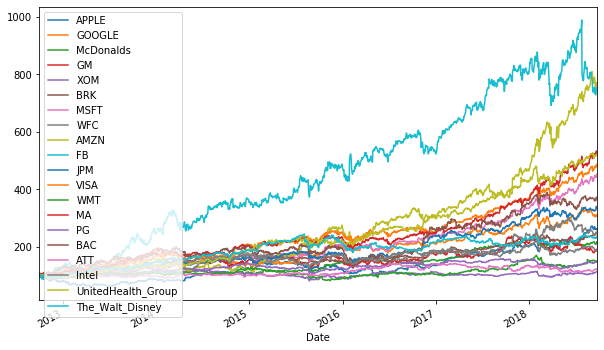

In [111]:
(data / data.ix[0] * 100).plot(figsize=(10, 6))

In [112]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,APPLE,GOOGLE,McDonalds,GM,XOM,BRK,MSFT,WFC,AMZN,FB,JPM,VISA,WMT,MA,PG,BAC,ATT,Intel,UnitedHealth_Group,The_Walt_Disney
Date,,,,,,,,,,,,,,,,,,,,
2012-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-02,0.002908,-0.006308,-0.011590,0.025231,-0.000872,0.001705,0.005748,0.003452,-0.005611,0.012653,-0.001221,-0.005354,-0.004060,0.001662,-0.009549,-0.003354,0.001588,0.003509,0.006004,-0.008292
2012-10-03,0.015217,0.007252,-0.006399,0.029542,-0.000218,0.006270,0.006721,0.017649,0.021007,-0.019955,0.005891,0.018360,0.006083,0.034596,0.005509,0.019957,0.009476,-0.012778,0.001056,0.015945
2012-10-04,-0.006950,0.007252,0.007498,0.010604,0.005655,0.009029,0.005677,0.014844,0.017623,0.005482,0.023223,0.008268,0.006983,0.002361,0.003031,0.032400,0.004444,-0.003554,0.019333,0.003045
2012-10-05,-0.021541,-0.000521,-0.000330,0.006067,0.003572,0.002023,-0.006012,-0.003621,-0.007553,-0.048540,-0.002634,0.004215,0.005472,0.007158,0.003597,-0.009611,-0.001056,0.009303,-0.014596,0.006440


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee05c37890>,
      dtype=object)

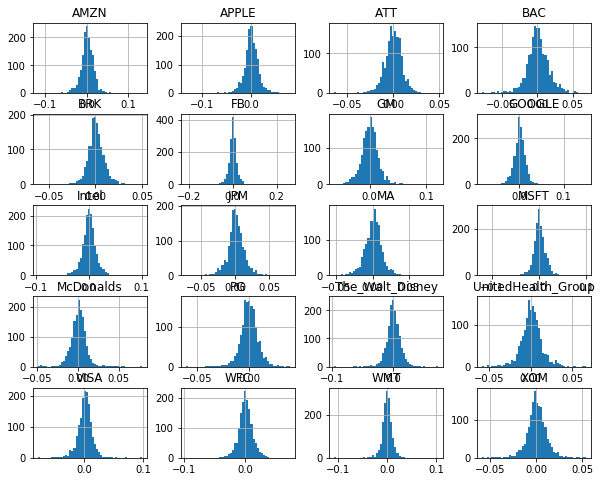

In [113]:
log_returns.hist(bins=50, figsize=(10, 8))

# 2, mean variance model
## (1) Model optimization

In [114]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data,frequency=252)

#mean variance model optimization
EF_min = EfficientFrontier(mu, S)

EF_min.min_volatility()
#portfolio performance
EF_min.portfolio_performance(verbose=True)

Expected annual return: 11.6%
Annual volatility: 10.6%
Sharpe Ratio: 0.90


(0.11557647291693551, 0.10646529658227717, 0.8977241973216437)

In [115]:
#CAPM理論に基づき、平均分散モデルを最適化
#無リスク金利を入れる
EF = EfficientFrontier(mu, S)
weights = EF.max_sharpe(risk_free_rate=risk_free_annual)
#ポートフォリオの年リターン、ボラティリティ、シャープ・レシオを求める
EF.portfolio_performance(verbose=True)

Expected annual return: 31.3%
Annual volatility: 16.0%
Sharpe Ratio: 1.83


(0.3133029392712332, 0.16004365773318044, 1.8326433138651346)

In [116]:
#各ウェイトをプリントする
EF.clean_weights()

OrderedDict([('APPLE', 0.0),
             ('GOOGLE', 0.0),
             ('McDonalds', 0.02215),
             ('GM', 0.0),
             ('XOM', 0.0),
             ('BRK', 0.0),
             ('MSFT', 0.09304),
             ('WFC', 0.0),
             ('AMZN', 0.13933),
             ('FB', 0.10216),
             ('JPM', 0.0),
             ('VISA', 0.10452),
             ('WMT', 0.0),
             ('MA', 0.16296),
             ('PG', 0.0),
             ('BAC', 0.0),
             ('ATT', 0.0),
             ('Intel', 0.0),
             ('UnitedHealth_Group', 0.37584),
             ('The_Walt_Disney', 0.0)])

## (2) For the simulation, the data of each stock from September 13, 2019 to December 13, 2019 will be collected.

In [117]:
data2=pd.DataFrame([])
name2=["AAPL","GOOGL","MCD","GM","XOM","BRK-A","MSFT","WFC","AMZN","FB","JPM","V",
             "WMT","MA","PG","BAC","T","INTC","UNH","DIS"]

columns2=["APPLE","GOOGLE","McDonalds","GM","XOM","BRK","MSFT","WFC","AMZN","FB","JPM","VISA",
             "WMT","MA","PG","BAC","ATT","Intel","UnitedHealth_Group","The_Walt_Disney"]

for idx,stock in enumerate(name2):
    name = pdr.get_data_yahoo(stock, start=datetime.datetime(2018, 9, 25), 
                          end=datetime.datetime(2019, 9, 24))
    j=columns[idx]
    data2[j]=name["Adj Close"]

## (3) If managed from September 13, 2019 to December 13, 2019, the average return of the portfolio will be
## R = 1r1 + w2r2 + ... + wn * rn
## ri = Return of individual stock
## wi = weight of individual stock
## R = average revenue of the portfolio

In [118]:
Mean_variance_return=np.sum(np.array(EF.weights)*np.array(expected_returns.mean_historical_return(data2, frequency=252)))

In [119]:
Mean_variance_return

0.052360068502017174

## (4) Volatility of the mean variance model portfolio

In [120]:
from pypfopt import objective_functions
objective_functions.portfolio_variance(EF.weights, risk_models.sample_cov(data2))

0.051575913447092545

# 3. Black – Litterman model

## (1) For the simulation period, calculate the return of each issue from September 13, 2019 to December 13, 2019

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


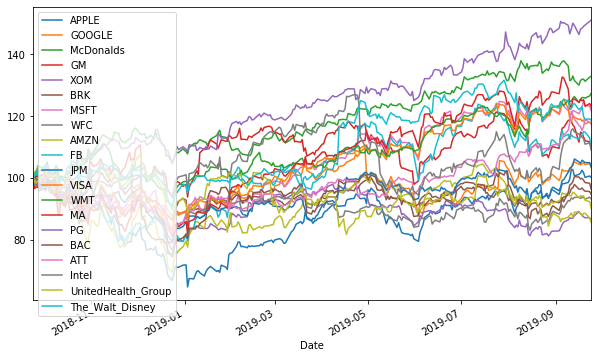

In [121]:
(data2 / data2.ix[0] * 100).plot(figsize=(10, 6))

In [169]:
expected_returns.mean_historical_return(data2, frequency=252)

APPLE                 0.052789
GOOGLE                0.073778
McDonalds             0.299691
GM                    0.137557
XOM                  -0.132187
BRK                  -0.035906
MSFT                  0.232971
WFC                  -0.047611
AMZN                 -0.043119
FB                    0.147280
JPM                   0.057230
VISA                  0.194010
WMT                   0.258941
MA                    0.250547
PG                    0.434396
BAC                  -0.003515
ATT                   0.183480
Intel                 0.134533
UnitedHealth_Group   -0.122655
The_Walt_Disney       0.199716
dtype: float64

## (3) Setting critic reviews for each brand
Referring to the above figures and data,
For example, one critic predicts that after three months, Apple, United Health Group, Google, Microsoft, Facebook,  McDonalds, Procter & Gamble ,will rise by  0.05, -0.12, 0.07, 0.23, 0.15, 0.3,0.43 and that other stocks are unknown. Then, use the Black Litterman model and set as follows

In [175]:
from pypfopt.black_litterman import BlackLittermanModel
S = risk_models.sample_cov(data)

viewdict = {"APPLE":  0.05,
           "UnitedHealth_Group": -0.12, "GOOGLE": \
            0.07,"MSFT": 0.23,"FB": 0.15,"McDonalds": 0.3,"PG": 0.43}

In [176]:
bl = BlackLittermanModel(S, absolute_views=viewdict)
rets = bl.bl_returns()

/usr/local/anaconda3/lib/python3.7/site-packages/pypfopt/black_litterman.py:252: UserWarning: Running Black-Litterman with no prior.
  warnings.warn("Running Black-Litterman with no prior.")


## (4) Calculate the return of each brand

In [177]:
rets

APPLE                 0.081179
GOOGLE                0.102669
McDonalds             0.179195
GM                    0.092806
XOM                   0.111946
BRK                   0.102497
MSFT                  0.165690
WFC                   0.091560
AMZN                  0.109526
FB                    0.114165
JPM                   0.104841
VISA                  0.125748
WMT                   0.113014
MA                    0.128785
PG                    0.224452
BAC                   0.089426
ATT                   0.107138
Intel                 0.126267
UnitedHealth_Group    0.009140
The_Walt_Disney       0.102901
dtype: float64

## (5) Introduce SP500 as market price

In [178]:
SP500 = pdr.get_data_yahoo('^GSPC', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2018, 9, 24))

In [179]:
market_prices=SP500["Close"]

In [24]:
# (market_prices.pct_change().values[1:].sum()/len(market_prices.pct_change().values[1:]))*252*8

## (6) The study period will be from October 1, 2012 to September 12, 2019.

In [180]:
from pypfopt import black_litterman

delta = black_litterman.market_implied_risk_aversion(market_prices,risk_free_rate=risk_free_annual)

ef = EfficientFrontier(rets, S)

bl.bl_weights(delta)
weights = bl.clean_weights()

In [181]:
bl.portfolio_performance(verbose=True)

Expected annual return: 26.5%
Annual volatility: 14.8%
Sharpe Ratio: 1.66


(0.2654297397114184, 0.14759656925742262, 1.662841764860844)

In [182]:
weights

OrderedDict([('APPLE', -0.04205),
             ('GOOGLE', -0.0521),
             ('McDonalds', 0.4077),
             ('GM', 0.0),
             ('XOM', 0.0),
             ('BRK', 0.0),
             ('MSFT', 0.10176),
             ('WFC', 0.0),
             ('AMZN', 0.0),
             ('FB', 0.02402),
             ('JPM', 0.0),
             ('VISA', 0.0),
             ('WMT', 0.0),
             ('MA', 0.0),
             ('PG', 0.8193),
             ('BAC', 0.0),
             ('ATT', 0.0),
             ('Intel', 0.0),
             ('UnitedHealth_Group', -0.25864),
             ('The_Walt_Disney', 0.0)])

In [183]:
sum(weights.values())

0.9999900000000002

## (7) If managed from September 13, 2019 to December 13, 2019, the average return of the portfolio will be
## R = 1r1 + w2r2 + ... + wn * rn
## ri = Return of individual stock
## wi = weight of individual stock
## R = average revenue of the portfolio

In [184]:
BL_return=np.sum(np.array(bl.weights)*np.array(expected_returns.mean_historical_return(data2, frequency=252)))

In [185]:
BL_return

0.5309927605199798

## (8) Portfolio volatility

In [186]:
from pypfopt import objective_functions
objective_functions.portfolio_variance(bl.weights, risk_models.sample_cov(data2))

0.03780342465637397

# 4, Portfolio comparison

## (1) Portfolio weight comparison

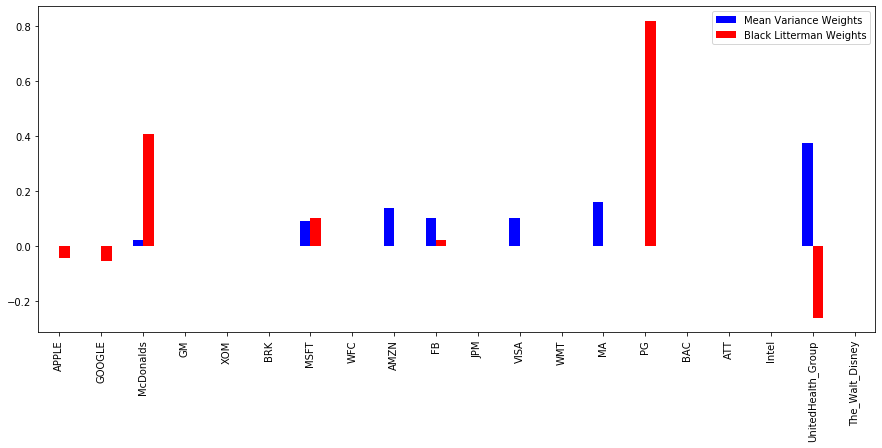

In [187]:
df = pd.DataFrame([EF.weights.reshape(20),np.array(list(bl.weights)).reshape(20)],
                  columns=["APPLE","GOOGLE","McDonalds","GM","XOM","BRK","MSFT","WFC","AMZN","FB","JPM","VISA",
             "WMT","MA","PG","BAC","ATT","Intel","UnitedHealth_Group","The_Walt_Disney"],
                  index=['Mean Variance Weights','Black Litterman Weights'])
df.T.plot(kind='bar', color='br',figsize=(15, 6))

## (2) Analysis
## Blue represents the original stock weight and red represents the newly calculated portfolio weight incorporating the investor's view. Weights have been newly calculated for the Black Litterman model, given information that stocks from Apple, Ghoull, JP Morgan, United Health Group and others will rise.

## (3) Comparison of simulated portfolio returns and volatility

In [219]:
df2 = pd.DataFrame([[EF.portfolio_performance()[0],bl.portfolio_performance()[0],Mean_variance_return,BL_return],\
                    [EF.portfolio_performance()[1],\
                     bl.portfolio_performance()[1],\
                    objective_functions.portfolio_variance(EF.weights, risk_models.sample_cov(data2)),\
                    objective_functions.portfolio_variance(bl.weights, risk_models.sample_cov(data2))
                    ],[EF.portfolio_performance()[2],bl.portfolio_performance()[2],"N/A","N/A"]],columns=["Mean Variance expected value","Black Litterman expected value","Mean Variance simulated value","Black Litterman simulated value"],index=["Return","Variance","Portfolio Sharpe Ratio"])
    
df2

,Mean Variance expected value,Black Litterman expected value,Mean Variance simulated value,Black Litterman simulated value
Return,0.313303,0.265430,0.0523601,0.530993
Variance,0.160044,0.147597,0.0515759,0.0378034
Portfolio Sharpe Ratio,1.832643,1.662842,N/A,N/A


# 5, conclusion
## From September 25, 2018 to September 24, 2019, the mean variance model and the Black Litterman model were compared, the average revenue of the portfolio was calculated, and the Black Litterman model was adopted.  In simulation period the volatility increased slightly by 0.013%, resulting in a Black Litterman model with a return to 53.1% much more higher than the mean variance model.
## The average return of Black Litterman simulated value in 252 days is  much higher than the expected annual return of Black Litterman expected value and the annual return of Mean Variance expected value.
## The Portfolio Sharpe Ratio did not exactly assume the performance of portfolio, because  it only calculate  based  on the historic Return data which is not correct.
## Reading related research papers may seem obvious, but those who believe they have better information than others suggest that they perform better than market-average portfolios. In portfolio management, it is important to perform not only algorithms but also critic information, market information, and most importantly, corporate analysis.

# 6, reference list
## References, translated by David G. Ruenberger, Hiroshi Konno, Kenichi Suzuki, Norio Bibiki, "Introduction to Financial Engineering: Second Edition," Nihon Keizai Shimbun (2015)
## References, Takahiro Komatsu “Optimal Investment Strategy” Asakura Shoten (2018)
## References, PyPortfolioOpt, https://pyportfolioopt.readthedocs.io/en/latest/